___

<a href='https://github.com/ai-vithink'> <img src='https://avatars1.githubusercontent.com/u/41588940?s=200&v=4' /></a>
___

# Distribution Plots

Let's discuss some plots that allow us to visualize the distribution of a data set. These plots are:

* distplot
* jointplot
* pairplot
* rugplot
* kdeplot

In [2]:
import seaborn as sns

In [23]:
%matplotlib inline
sns.set_style('darkgrid')

* Inline to show plots in jupyter notebook.
* Darkgrid to show background grid in seaborn. Don't include if you prefer plots with white plain background.

## Data
Seaborn comes with built-in data sets!

In [24]:
# Grabbing tips dataset and saving it with same name.
tips = sns.load_dataset('tips')

In [25]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 3px  black solid !important;
  color: black !important;
}
# For having gridlines 

In [26]:
tips.head() #Data showing people who had a meal, relatead info and how much tip they left.

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## distplot

The distplot shows the distribution of a univariate set of observations.

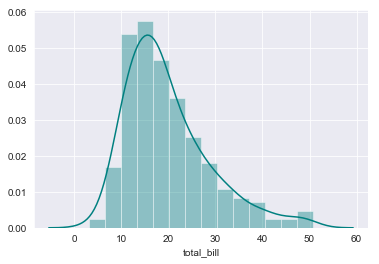

In [27]:
# Univariate is scientific way of saying one variable.
sns.distplot(tips['total_bill'],color='teal')  # Seeing how total bill is distributed


* Passing single column of dataframe.
* In case you get a warning then do not worry about it, it is a potential conflict with another package stats models, but that won't affect your sns.distplot().
* What we get is a histrogram or KDE Kernel Density Estimation. 
* More on KDE later. KDE can be removed to retain just the histrogram part as well, as shown below.

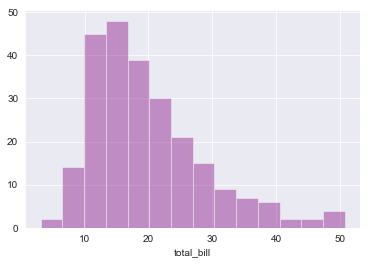

In [28]:
sns.distplot(tips['total_bill'],color='purple',kde=False)
# Just a distribution with frequency giving us an idea of where the total bill lies.